First, we load the necessary libraries.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 6)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.24"

# Common imports
import numpy as np
import os
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# text preprocessing libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import WordPunctTokenizer
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

#regular expressions
import re

# signos de puntuación
import string

In [2]:
print('The nltk version is {}.'.format(nltk.__version__))
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The nltk version is 3.6.7.
The scikit-learn version is 0.24.2.


# The database

This project consists of a binary classification task where:

    - 0 corresponds to a non hate speech tweet
    
    - 1 corresponds to a hate speech

In [3]:
# CARGAMOS LOS DATOS
tweets = pd.read_csv("FinalBalancedDataset.csv")

In [4]:
# MIRAMOS LOS PRIMEROS TWEETS
tweets.head()

,Unnamed: 0,Toxicity,tweet
0,0,0,@user when a father is dysfunctional and is s...
1,1,0,@user @user thanks for #lyft credit i can't us...
2,2,0,bihday your majesty
3,3,0,#model i love u take with u all the time in ...
4,4,0,factsguide: society now #motivation


In [5]:
# NOS DESHACEMOS DEL NÚMERO DE IDENTIFICACIÓN
tweets.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
tweets.head()

,Toxicity,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [7]:
# CÓMO VER UN TWEET ALEATORIO
random = np.random.randint(0,len('tweet'))
print(random)
(tweets.iloc[random]['tweet'], tweets.iloc[random]['Toxicity'])

3


('#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  ',
 0)

In [8]:
# TWEET DE ODIO
(tweets.iloc[51555]['tweet'], tweets.iloc[51555]['Toxicity'])

('RT @lumponthegrind: Great pussy will have you doing shit you would think you would never do',
 1)

In [9]:
# CREAMOS UNA COPIA DE LA BASE DE DATOS
copia = tweets.copy()

## La base de datos: preparación

In [10]:
copia.head()

,Toxicity,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [11]:
# LIMPIEZA DEL TEXTO


# la siguiente función sirve para quitar los diátricos del texto
def simplify(text):
    import unicodedata
    try:
        text = unicode(text, 'utf-8')
    except NameError:
        pass
    text = unicodedata.normalize('NFD', text).encode('ascii', 'ignore').decode("utf-8")
    return str(text)


copia['tweet'] = copia['tweet'].apply(simplify)


# quitamos todas las palabras que empiecen por @ 

copia['tweet'].replace(r'@\w+','',regex=True,inplace=True)


# quitamos todas las urls

copia['tweet'].replace(r'http\S+','',regex=True,inplace=True)

In [12]:
# separamos en sub-cadenas cada tweet usando TweetTokenizer

tokenizer = TweetTokenizer(preserve_case=True)
copia['tweet'] = copia['tweet'].apply(tokenizer.tokenize)

In [13]:
copia.head()

,Toxicity,tweet
0,0,"[when, a, father, is, dysfunctional, and, is, ..."
1,0,"[thanks, for, #lyft, credit, i, can't, use, ca..."
2,0,"[bihday, your, majesty]"
3,0,"[#model, i, love, u, take, with, u, all, the, ..."
4,0,"[factsguide, :, society, now, #motivation]"


In [14]:
# La siguiente función sirve para quitar los símbolos hashtagh

def remove_hashsymbols(text):
    '''Function to remove the hashtag symbol from the text'''
    pattern = re.compile(r'#')
    text = ' '.join(text)
    clean_text = re.sub(pattern,'',text)
    return tokenizer.tokenize(clean_text)  


copia['tweet'] = copia['tweet'].apply(remove_hashsymbols)

In [15]:
copia.head()

,Toxicity,tweet
0,0,"[when, a, father, is, dysfunctional, and, is, ..."
1,0,"[thanks, for, lyft, credit, i, can't, use, cau..."
2,0,"[bihday, your, majesty]"
3,0,"[model, i, love, u, take, with, u, all, the, t..."
4,0,"[factsguide, :, society, now, motivation]"


In [16]:
# ANÁLISIS BÁSICO: palabras más frecuentes en los tweets

import operator
from collections import Counter

count_all = Counter()

for line in copia['tweet']:
    terms_all = [term for term in line]
    "#Actualiza el contador"
    count_all.update(terms_all)
    "#Imprime las primeras palabras con mayor frecuencia"
    
print(count_all.most_common(200))

[('.', 22418), ('!', 17922), ('a', 17917), ('the', 16823), ('to', 15105), (':', 12594), (',', 12371), ('you', 10758), ('and', 8627), ('bitch', 8241), ('RT', 7612), ('in', 7602), ('is', 7008), ('"', 6834), ('my', 6792), ('I', 6742), ('i', 6740), ('of', 6682), ('for', 6553), ('that', 5100), ('?', 5092), ('on', 5074), ('...', 4920), ('be', 4797), ('me', 4478), ('with', 4337), ('this', 4322), ('it', 4315), ('like', 3741), ('love', 3411), ('all', 3223), ('so', 3144), ('your', 3131), ('bitches', 3033), ('are', 2999), ('😂', 2786), ('at', 2711), ('&', 2709), ('have', 2637), ('just', 2632), ('day', 2600), ('up', 2509), ('but', 2379), ('hoes', 2348), ('u', 2346), ('-', 2301), ('get', 2262), ('not', 2260), ('when', 2241), ('pussy', 2177), ('was', 2031), ('out', 2000), ('do', 1959), ('hoe', 1921), ('they', 1919), ("don't", 1916), ('no', 1884), ('we', 1882), ('..', 1847), ('happy', 1790), ('about', 1775), ('got', 1747), ('“', 1726), ('what', 1714), ('will', 1687), ('ass', 1618), ('from', 1613), ('i

In [17]:
# lista predeterminada de palabras vacías
nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
# Creamos nuestra propia lista
stop_words = stopwords.words('english')

In [19]:
# lista predeterminada de signos de puntuación
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
lista_signos = list(string.punctuation)

for words in lista_signos:
    stop_words.append(words)

In [21]:
additional_list = ['ai','rt','u',"can't",'ur','amp',"i'm"]

for words in additional_list:
    stop_words.append(words)

In [22]:
# función para eliminar las palabras vacías

def remove_stopwords(text):
    clean_text = [word for word in text if not word in stop_words]
    return clean_text 

copia['tweet'] = copia['tweet'].apply(remove_stopwords)

In [23]:
# REPETIMOS EL PROCESO

count_all = Counter()
for line in copia['tweet']:
    terms_all = [term for term in line]
    "#Actualiza el contador"
    count_all.update(terms_all)
    "#Imprime las primeras 5 palabras con mayor frecuencia"
print(count_all.most_common(200))

[('bitch', 8241), ('RT', 7612), ('I', 6742), ('...', 4920), ('like', 3741), ('love', 3411), ('bitches', 3033), ('😂', 2786), ('day', 2600), ('hoes', 2348), ('get', 2262), ('pussy', 2177), ('hoe', 1921), ('..', 1847), ('happy', 1790), ('got', 1747), ('“', 1726), ('ass', 1618), ("I'm", 1564), ('time', 1550), ('one', 1420), ('life', 1386), ('”', 1359), ('shit', 1336), ('good', 1315), ('fuck', 1270), ('go', 1239), ('new', 1222), ('know', 1218), ('people', 1215), ('want', 1214), ('today', 1208), ('see', 1198), ('trash', 1161), ('nigga', 1151), ('lol', 1041), ('…', 1039), ('make', 998), ('thankful', 950), ('need', 948), ('positive', 940), ("ain't", 897), ('take', 889), ('back', 889), ('really', 875), ('2', 860), ('think', 857), ('bihday', 854), ('You', 809), ('never', 789), ('work', 775), ('girl', 773), ('still', 772), ('going', 752), ('right', 746), ('look', 739), ('smile', 738), ('way', 723), ('man', 709), ('say', 698), ('even', 690), ('bad', 686), ('2016', 677), ('us', 677), ('niggas', 676

In [24]:
stop_words = ['I', '...', '..', 'get', 'got', '“', "I'm", '…', 'RT', "ain't", 'If', "that's", 'The', 'This', 'ya', 'im', 'n', 'gonna', 'A', 'da']
copia['tweet'] = copia['tweet'].apply(remove_stopwords)

In [25]:
copia.head()

,Toxicity,tweet
0,0,"[father, dysfunctional, selfish, drags, kids, ..."
1,0,"[thanks, lyft, credit, use, cause, offer, whee..."
2,0,"[bihday, majesty]"
3,0,"[model, love, take, time]"
4,0,"[factsguide, society, motivation]"


In [26]:
# función para eliminar los dígitos del texto

def rem_digits(text):
    '''Function to remove the digits from the list of strings'''
    no_digits = []
    for word in text:
        no_digits.append(re.sub(r'\d','',word))
    return ' '.join(no_digits) 

copia['tweet'] = copia['tweet'].apply(rem_digits)

## La base de datos: visualización

/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


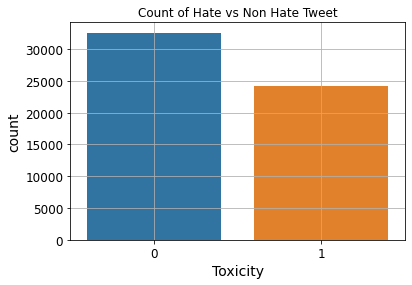

In [27]:
# vemos la cantidad de tweets que tenemos en cada conjunto

import seaborn as sns

sns.countplot(copia['Toxicity'])
plt.title('Count of Hate vs Non Hate Tweet')
plt.grid()
plt.show()

In [28]:
copia['tweet'] = copia['tweet'].apply(tokenizer.tokenize)

In [29]:
copia.head()

,Toxicity,tweet
0,0,"[father, dysfunctional, selfish, drags, kids, ..."
1,0,"[thanks, lyft, credit, use, cause, offer, whee..."
2,0,"[bihday, majesty]"
3,0,"[model, love, take, time]"
4,0,"[factsguide, society, motivation]"


In [30]:
# función para ver los 10 tokens más comunes y sus frecuencias

count_all = Counter()
for line in copia['tweet']:
    terms_all = [term for term in line]
    "#Actualiza el contador"
    count_all.update(terms_all)
    "#Imprime las primeras 5 palabras con mayor frecuencia"
    
print(count_all.most_common(10))

[('bitch', 8241), ('like', 3791), ('love', 3413), ('bitches', 3033), ('😂', 2786), ('day', 2620), ('hoes', 2348), ('pussy', 2177), ('hoe', 1921), ('happy', 1790)]


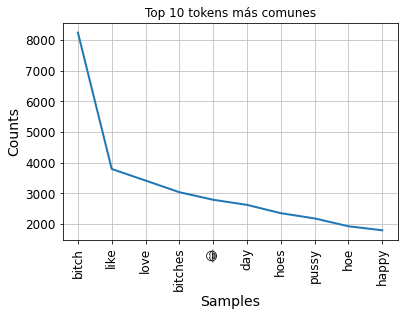

In [31]:
frequency = nltk.FreqDist(count_all)
plt.title('Top 10 tokens más comunes')
frequency.plot(10,cumulative=False)
plt.show()

In [32]:
# veamos si hay valores nulos

copia.isnull().sum()

Toxicity    0
tweet       0
dtype: int64

## Comienzo de proyecto de Machine Learning

In [33]:
copia.head()

,Toxicity,tweet
0,0,"[father, dysfunctional, selfish, drags, kids, ..."
1,0,"[thanks, lyft, credit, use, cause, offer, whee..."
2,0,"[bihday, majesty]"
3,0,"[model, love, take, time]"
4,0,"[factsguide, society, motivation]"


In [34]:
# volvemos a juntar los tweets en una sola cadena
copia['tweet'] = copia['tweet'].apply(lambda x: ' '.join(x))

In [35]:
copia.head(3)

,Toxicity,tweet
0,0,father dysfunctional selfish drags kids dysfun...
1,0,thanks lyft credit use cause offer wheelchair ...
2,0,bihday majesty


Separamos nuestra base de datos en X (los tweets) e Y (la toxicidad).

In [36]:
X = copia['tweet']
Y = copia['Toxicity']

Ahora, separamos la base de datos en un TRAIN SET y un TEST SET.

Scikit-Learn ofrece ciertas funciones para dividir los datos en distintos subgrupos de maneras distintas. 
La función más simple es train_test_split(), que es la que vamos a usar.

En primer lugar, definimos el "test_size" donde indicamos el tamaño que queremos para nuestro test set. Como tenemos un conjunto de datos suficientemente grande, vamos a separar el 20% de los datos para el test set.

En segundo lugar, tenemos el parámetro "random_state" que nos permite crear la semilla generadora aleatoria.

Por último, gracias al parámetro "stratify" los datos se dividen de forma estratificada. 

Es importante tener en cuenta que  puedes pasarle varios conjuntos de datos con un número idéntico de filas, y los dividirá en los mismos índices (esto es muy útil, ya que por ejemplo, en nuestro caso, podemos pasarle al mismo tiempo X e Y).

In [37]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=51,
                                                 stratify=copia['Toxicity'])

print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(45396,) (11349,) (45396,) (11349,)


A continuación, usamos TF-IDF:

In [38]:
# importamos tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [39]:
#instanciamos el vectorizador 
vectorizer = TfidfVectorizer(max_features=5000)

In [40]:
# probamos en el TRAINING SET
X_train = vectorizer.fit_transform(X_train)

# transformamos el TEST SET
X_test = vectorizer.transform(X_test)

In [41]:
# comprobamos el espacio
X_train.shape, X_test.shape

((45396, 5000), (11349, 5000))

# Primer modelo de clasificación: Regresión Logística con hiperparámetros por defecto

In [42]:
# importamos el modelo

from sklearn.linear_model import LogisticRegression

In [43]:
# lo inicializamos con hiperparámetros por defecto

logreg_clf1 = LogisticRegression()
logreg_clf1.fit(X_train,Y_train)
train_predictions1 = logreg_clf1.predict(X_train)
test_predictions1 = logreg_clf1.predict(X_test)

## Evaluación del primer modelo

In [44]:
# importamos ciertas métricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [45]:
# Vemos la "accuracy" en el training set y en el test set

print('Accuracy Score on training set %.5f' %accuracy_score(Y_train,train_predictions1))
print('Accuracy Score on test set %.5f' %accuracy_score(Y_test,test_predictions1))

Accuracy Score on training set 0.94826
Accuracy Score on test set 0.93673


In [46]:
print('Classification Report Training set')
print('\n')
print(classification_report(Y_train,train_predictions1))

Classification Report Training set


              precision    recall  f1-score   support

           0       0.93      0.98      0.96     26074
           1       0.97      0.90      0.94     19322

    accuracy                           0.95     45396
   macro avg       0.95      0.94      0.95     45396
weighted avg       0.95      0.95      0.95     45396



In [47]:
print('Classification Report Testing set')
print('\n')
print(classification_report(Y_test,test_predictions1))

Classification Report Testing set


              precision    recall  f1-score   support

           0       0.92      0.98      0.95      6518
           1       0.97      0.88      0.92      4831

    accuracy                           0.94     11349
   macro avg       0.94      0.93      0.93     11349
weighted avg       0.94      0.94      0.94     11349



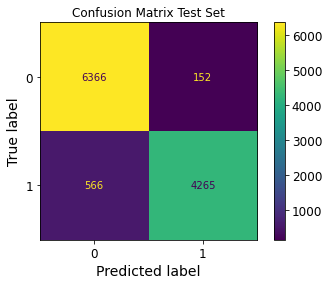

In [48]:
# MATRIZ DE CONFUSIÓN

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(logreg_clf1,X_test,Y_test)
plt.title('Confusion Matrix Test Set')
plt.show()

In [49]:
# PRECISIÓN

from sklearn.metrics import precision_score, recall_score

precision_score(Y_test,test_predictions1)

0.9655875028299751

In [50]:
# RECUPERACIÓN

recall_score(Y_test,test_predictions1)

0.8828399917201407

In [51]:
# PUNTUACIÓN F1

from sklearn.metrics import f1_score

f1_score(Y_test,test_predictions1)

0.9223615916955017

In [52]:
# BALANCE PRECISIÓN/RECUPERACIÓN

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve


y_scores1 = cross_val_predict(logreg_clf1, X_train, Y_train, cv=3,
                             method="decision_function")

precisions, recalls, thresholds = precision_recall_curve(Y_train, y_scores1)

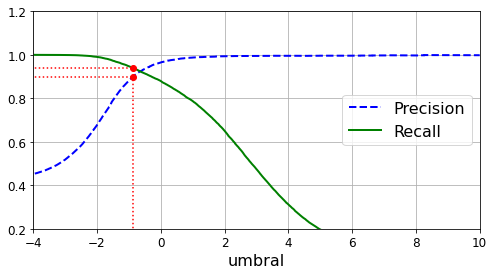

In [53]:
# CURVA PRECISIÓN FRENTE A RECUPERACIÓN EN FUNCIÓN DEL UMBRAL
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) 
    plt.xlabel("umbral", fontsize=16)       
    plt.grid(True)                          
    plt.axis([-4, 10, 0.2, 1.2])           



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                              
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 
plt.plot([-10, threshold_90_precision], [0.9, 0.9], "r:")                                  
plt.plot([-10, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")   
plt.plot([threshold_90_precision], [0.9], "ro")                                            
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             
plt.show()

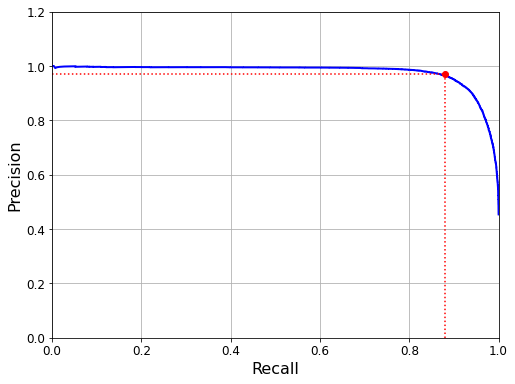

In [54]:
# CURVA PRECISIÓN VS RECUPERACIÓN

def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1.2])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
#plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
#plt.plot([0.0, recall_90_precision], [0.97, 0.97], "r:")
#plt.plot([recall_90_precision], [0.9], "ro")
plt.plot([0,0.88],[0.97,0.97], "r:")
plt.plot([0.88,0.88],[0.,0.97], "r:")
plt.plot([0.88],[0.97], "ro")
plt.show()

In [55]:
# CURVA ROC

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(Y_train, y_scores1)

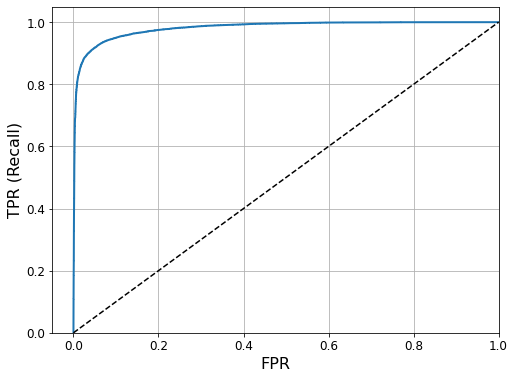

In [56]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([-0.05, 1, 0, 1.05])                                    
    plt.xlabel('FPR', fontsize=16) 
    plt.ylabel('TPR (Recall)', fontsize=16)    
    plt.grid(True)                                            

plt.figure(figsize=(8, 6))                                  
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]                                                
plt.show()

In [57]:
# calculamos el área bajo la curva

from sklearn.metrics import roc_auc_score

roc_auc_score(Y_train, y_scores1)

0.9814635279568694

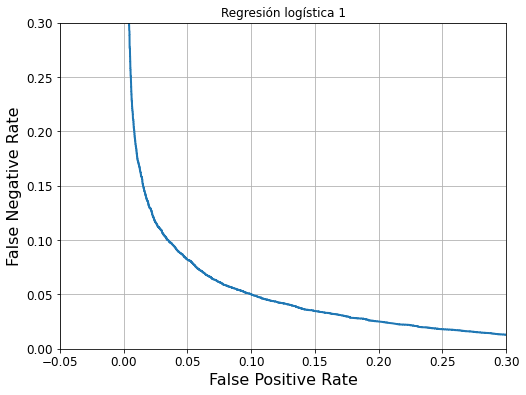

In [58]:
# CURVA DET

from sklearn.metrics import det_curve

fpr, fnr, thresholds = det_curve(Y_train, y_scores1)

def plot_det_curve(fpr, fnr, label=None):
    plt.plot(fpr, fnr, linewidth=2, label=label)
    plt.axis([-0.05, 0.3, 0, 0.3])                                    
    plt.xlabel('False Positive Rate', fontsize=16) 
    plt.ylabel('False Negative Rate', fontsize=16)    
    plt.grid(True) 
    
plt.figure(figsize=(8, 6))                                  
plot_det_curve(fpr, fnr)
plt.title('Regresión logística 1')
plt.show()

# Segundo modelo de clasificación: Regresión Logística mejorada

Algo que podemos hacer para mejorar nuestro modelo de Regresión Logística es tunear los hiperparámetros.
Una opción es ir probando distintos hiperparámetros manualmente y comparandolos hasta encontrar una buena combinación. Como esto puede ser un trabajo muy tedioso, es mejor utilizar GridSearchCV. Sólo necesitamos decirle con qué hyperparametros queremos experimentar y qué valores darles. GridSearchCV utilizará cross-validation para evaluar todas las posibles combinaciones.

In [59]:
# importamos las librerias necesarias para usar grid search
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [60]:
# definimos el espacio de búsqueda
from scipy.stats import loguniform
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)

In [61]:
# comprobamos el espacio de búsqueda
print(space)

{'solver': ['newton-cg', 'lbfgs', 'liblinear'], 'penalty': ['l1', 'l2', 'elasticnet'], 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f3ca123dbe0>}


In [62]:
# definimos los parámetros y ejecutamos
logreg_clf1 = LogisticRegression()
seed=51
folds = StratifiedKFold(n_splits=4,shuffle=True,random_state=seed)


grid_search = RandomizedSearchCV(estimator=logreg_clf1,param_distributions=space, n_iter=100, scoring='recall',
                            n_jobs=-1, cv=folds, random_state=seed)

grid_result = grid_search.fit(X_train,Y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:925: UserWarning: One or more of the test scores are non-finite: [0.86688735        nan 0.01707903 0.                nan        nan
        nan 0.54238705        nan        nan        nan 0.
 0.90684199 0.04792467        nan 0.         0.8921437         nan
 0.9056518  0.90653168        nan 0.90855003 0.86409258        nan
        nan 0.02168516        nan        nan 0.         0.
        nan 0.90606565        nan        nan        nan        nan
        nan        nan 0.02261675 0.00993697 0.73284391        nan
 0.01117905        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.8472207         nan
        nan        nan        nan 0.                nan        nan
 0.90606562        nan 0.66851272 0.         0.32641571        nan
        nan        nan        nan        nan 0.90477193        nan
        nan        nan        nan 0.         0.75856556 0.51195543
      

In [63]:
# EL MEJOR MODELO
grid_result.best_estimator_

LogisticRegression(C=9.946187215154557, penalty='l1', solver='liblinear')

In [64]:
# lo inicializamos
logreg_clf2 = LogisticRegression(C=9.946187215154557, penalty='l1', solver='liblinear')

In [65]:
logreg_clf2.fit(X_train,Y_train)
train_predictions2 = logreg_clf2.predict(X_train)
test_predictions2 = logreg_clf2.predict(X_test)

## Evaluación del segundo modelo

In [66]:
# Vemos la "accuracy" en el training set y en el test set
print('Accuracy Score on training set %.5f' %accuracy_score(Y_train,train_predictions2))
print('Accuracy Score on test set %.5f' %accuracy_score(Y_test,test_predictions2))

Accuracy Score on training set 0.97070
Accuracy Score on test set 0.93858


In [67]:
print('Classification Report Training set')
print('------------------------------------')
print('\n')
print(classification_report(Y_train,train_predictions2))

Classification Report Training set
------------------------------------


              precision    recall  f1-score   support

           0       0.97      0.98      0.97     26074
           1       0.98      0.95      0.97     19322

    accuracy                           0.97     45396
   macro avg       0.97      0.97      0.97     45396
weighted avg       0.97      0.97      0.97     45396



In [68]:
print('Classification Report Testing set')
print('------------------------------------')
print('\n')
print(classification_report(Y_test,test_predictions2))

Classification Report Testing set
------------------------------------


              precision    recall  f1-score   support

           0       0.93      0.96      0.95      6518
           1       0.95      0.91      0.93      4831

    accuracy                           0.94     11349
   macro avg       0.94      0.93      0.94     11349
weighted avg       0.94      0.94      0.94     11349



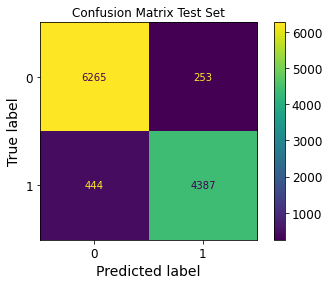

In [69]:
# MATRIZ DE CONFUSIÓN

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logreg_clf2,X_test,Y_test)
plt.title('Confusion Matrix Test Set')
plt.show()

In [70]:
# PRECISIÓN

precision_score(Y_test,test_predictions2)

0.9454741379310345

In [71]:
# RECUPERACIÓN

recall_score(Y_test,test_predictions2)

0.9080935624094391

In [72]:
# PUNTUACIÓN F1

f1_score(Y_test,test_predictions2)

0.9264069264069263

In [73]:
# BALANCE PRECISIÓN/RECUPERACIÓN

y_scores2 = cross_val_predict(logreg_clf2, X_train, Y_train, cv=3,
                             method="decision_function")

In [74]:
precisions, recalls, thresholds = precision_recall_curve(Y_train, y_scores2)

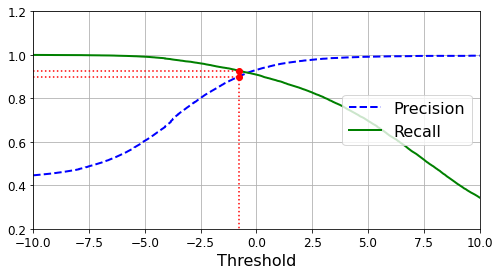

In [75]:
# CURVA PRECISIÓN FRENTE A RECUPERACIÓN EN FUNCIÓN DEL UMBRAL

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) 
    plt.xlabel("Threshold", fontsize=16)       
    plt.grid(True)                          
    plt.axis([-10, 10, 0.2, 1.2])           



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                              
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 
plt.plot([-10, threshold_90_precision], [0.9, 0.9], "r:")                                  
plt.plot([-10, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")   
plt.plot([threshold_90_precision], [0.9], "ro")                                            
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             
plt.show()

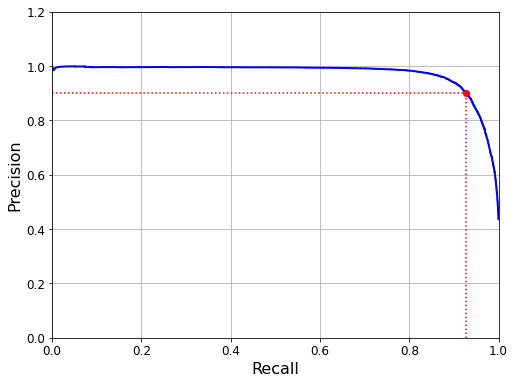

In [76]:
# CURVA PRECISIÓN VS RECUPERACIÓN

def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1.2])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
plt.show()

In [77]:
# CURVA ROC

fpr1, tpr1, thresholds = roc_curve(Y_train, y_scores2)

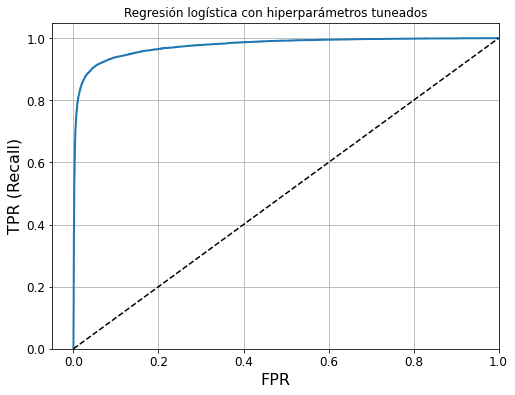

In [78]:
plt.figure(figsize=(8, 6))                                  
plot_roc_curve(fpr1, tpr1)
fpr_90 = fpr[np.argmax(tpr1 >= recall_90_precision)]         
plt.title('Regresión logística con hiperparámetros tuneados')
plt.show()

In [79]:
# calculamos el área bajo la curva
roc_auc_score(Y_train, y_scores2)

0.97597753952572

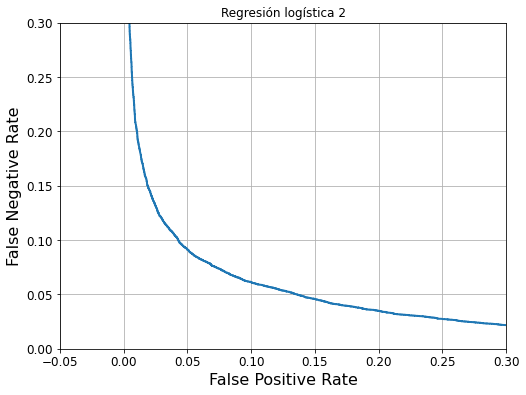

In [80]:
# CURVA DET

fpr1, fnr1, thresholds1 = det_curve(Y_train, y_scores2)

plt.figure(figsize=(8, 6))                                  
plot_det_curve(fpr1, fnr1)
plt.title('Regresión logística 2')
plt.show()

# Tercer modelo de clasificación: SVM - Support Vector Machine

In [81]:
# importamos el modelo

from sklearn.svm import LinearSVC

In [82]:
# inicializamos el modelo con hiperparámetros por defecto

linSVC_clf = LinearSVC()
linSVC_clf.fit(X_train,Y_train)
train_predictions3 = linSVC_clf.predict(X_train)
test_predictions3 = linSVC_clf.predict(X_test)

In [83]:
# Vemos la "accuracy" en el training set y en el test set
print('Accuracy Score on training set %.5f' %accuracy_score(Y_train,train_predictions3))
print('Accuracy Score on test set %.5f' %accuracy_score(Y_test,test_predictions3))

Accuracy Score on training set 0.96462
Accuracy Score on test set 0.94220


In [84]:
print('Classification Report Training set')
print('\n')
print(classification_report(Y_train,train_predictions3))

Classification Report Training set


              precision    recall  f1-score   support

           0       0.96      0.98      0.97     26074
           1       0.98      0.94      0.96     19322

    accuracy                           0.96     45396
   macro avg       0.97      0.96      0.96     45396
weighted avg       0.96      0.96      0.96     45396



In [85]:
print('Classification Report Testing set')
print('\n')
print(classification_report(Y_test,test_predictions3))

Classification Report Testing set


              precision    recall  f1-score   support

           0       0.93      0.97      0.95      6518
           1       0.96      0.91      0.93      4831

    accuracy                           0.94     11349
   macro avg       0.94      0.94      0.94     11349
weighted avg       0.94      0.94      0.94     11349



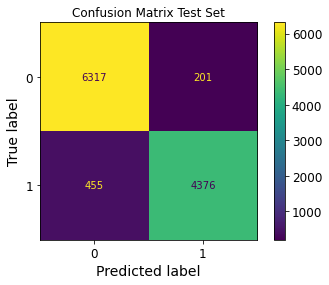

In [86]:
# MATRIZ DE CONFUSIÓN
plot_confusion_matrix(linSVC_clf,X_test,Y_test)
plt.title('Confusion Matrix Test Set')
plt.show()

In [87]:
# PRECISIÓN
precision_score(Y_test,test_predictions3)

0.9560847716845094

In [88]:
# RECUPERACIÓN
recall_score(Y_test,test_predictions3)

0.905816601117781

In [89]:
# BALANCE PRECISIÓN/RECUPERACIÓN

y_scores3 = cross_val_predict(linSVC_clf, X_train, Y_train, cv=3,
                             method="decision_function")

In [90]:
precisions, recalls, thresholds = precision_recall_curve(Y_train, y_scores3)

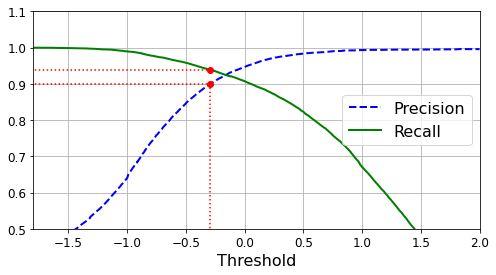

In [91]:
# CURVA PRECISIÓN FRENTE A RECUPERACIÓN EN FUNCIÓN DEL UMBRAL

def plot_precision_recall_vs_threshold2(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) 
    plt.xlabel("Threshold", fontsize=16)       
    plt.grid(True)                          
    plt.axis([-1.80, 2, 0.5, 1.1])           



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                              
plot_precision_recall_vs_threshold2(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 
plt.plot([-10, threshold_90_precision], [0.9, 0.9], "r:")                                  
plt.plot([-10, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")   
plt.plot([threshold_90_precision], [0.9], "ro")                                            
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             
plt.show()

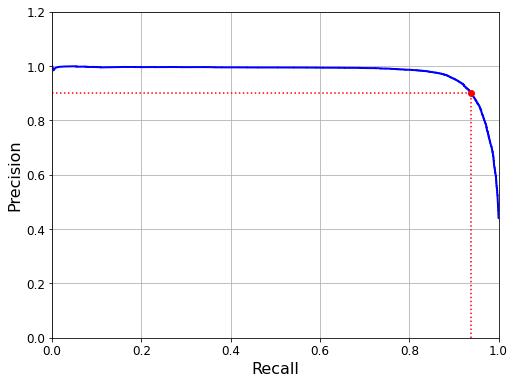

In [92]:
# CURVA PRECISIÓN VS RECUPERACIÓN

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
plt.show()

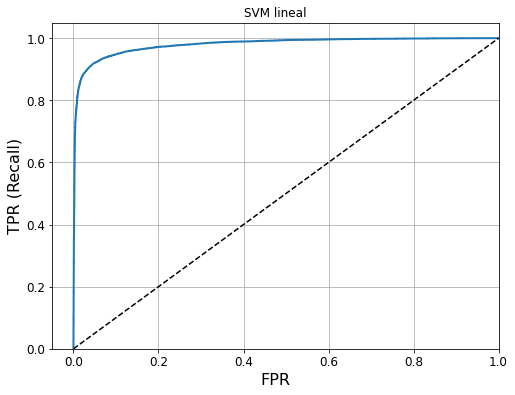

In [93]:
# CURVA ROC

fpr2, tpr2, thresholds = roc_curve(Y_train, y_scores3)

plt.figure(figsize=(8, 6))                                  
plot_roc_curve(fpr2, tpr2)
fpr_90 = fpr[np.argmax(tpr2 >= recall_90_precision)]         
plt.title('SVM lineal')
plt.show()

In [94]:
# calculamos el área bajo la curva
roc_auc_score(Y_train, y_scores3)

0.9795600652326334

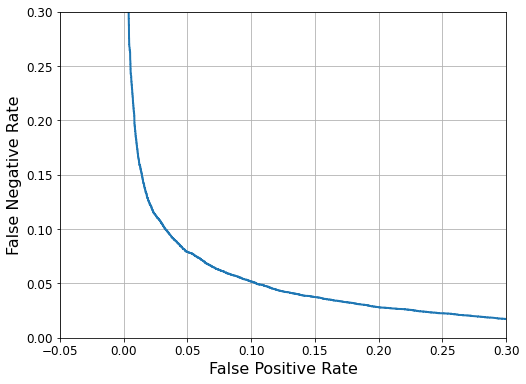

In [95]:
# CURVA DET

fpr2, fnr2, thresholds = det_curve(Y_train, y_scores3)

plt.figure(figsize=(8, 6))                                  
plot_det_curve(fpr2, fnr2)                                      
plt.show()

# Comparación de las curvas ROC y DET de los modelos

In [96]:
# PUNTUACIÓN ROC (área bajo la curva)

ROC1 = roc_auc_score(Y_train, y_scores1)
ROC2 = roc_auc_score(Y_train, y_scores2)
ROC3 = roc_auc_score(Y_train, y_scores3)
print('ROC AUC score for 1 %.5f' %ROC1)
print('ROC AUC score for 2 %.5f' %ROC2)
print('ROC AUC score for 3 %.5f' %ROC3)

ROC AUC score for 1 0.98146
ROC AUC score for 2 0.97598
ROC AUC score for 3 0.97956


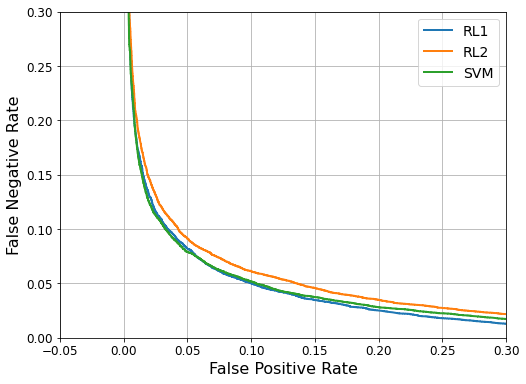

In [97]:
# CURVA ROC

plt.figure(figsize=(8, 6))                                  
plot_det_curve(fpr, fnr,"RL1")
plot_det_curve(fpr1,fnr1,"RL2")
plot_det_curve(fpr2, fnr2,"SVM")
plt.legend(loc="upper right",fontsize=14)
plt.show()

In [98]:
# CURVA ROC

fpr, tpr, thresholds = roc_curve(Y_train, y_scores1)
fpr1, tpr1, thresholds = roc_curve(Y_train, y_scores2)
fpr2, tpr2, thresholds = roc_curve(Y_train, y_scores3)

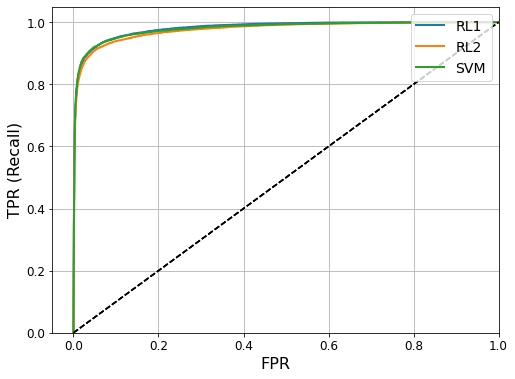

In [99]:
plt.figure(figsize=(8, 6))                                  
plot_roc_curve(fpr, tpr,"RL1")
plot_roc_curve(fpr1,tpr1,"RL2")
plot_roc_curve(fpr2, tpr2,"SVM")
plt.legend(loc="upper right", fontsize=14)
plt.show()